## support vector regression (cc exg ch cv)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### load data

In [3]:
with open("./standard_normal_data/train/grid_cc.npy", "rb") as fin:
    x_train_grid_cc = np.load(fin)
    
with open("./standard_normal_data/train/grid_exg.npy", "rb") as fin:
    x_train_grid_exg = np.load(fin)

with open("./standard_normal_data/train/grid_ch.npy", "rb") as fin:
    x_train_grid_ch = np.load(fin)
    
with open("./standard_normal_data/train/grid_cv.npy", "rb") as fin:
    x_train_grid_cv = np.load(fin)
        
with open("./standard_normal_data/train/yield_train.npy", "rb") as fin:
    y_train = np.load(fin)

In [4]:
print(x_train_grid_cc.shape)
print(x_train_grid_exg.shape)
print(x_train_grid_ch.shape)
print(x_train_grid_cv.shape)
print(y_train.shape)

(5068, 120)
(5068, 120)
(5068, 120)
(5068, 120)
(5068, 1)


In [5]:
with open("./standard_normal_data/valid/grid_cc.npy", "rb") as fin:
    x_valid_grid_cc = np.load(fin)
    
with open("./standard_normal_data/valid/grid_exg.npy", "rb") as fin:
    x_valid_grid_exg = np.load(fin)

with open("./standard_normal_data/valid/grid_ch.npy", "rb") as fin:
    x_valid_grid_ch = np.load(fin)
    
with open("./standard_normal_data/valid/grid_cv.npy", "rb") as fin:
    x_valid_grid_cv = np.load(fin)
        
with open("./standard_normal_data/valid/yield_valid.npy", "rb") as fin:
    y_valid = np.load(fin)

In [6]:
print(x_valid_grid_cc.shape)
print(x_valid_grid_exg.shape)
print(x_valid_grid_ch.shape)
print(x_valid_grid_cv.shape)
print(y_valid.shape)

(1086, 120)
(1086, 120)
(1086, 120)
(1086, 120)
(1086, 1)


In [7]:
with open("./standard_normal_data/test/grid_cc.npy", "rb") as fin:
    x_test_grid_cc = np.load(fin)
    
with open("./standard_normal_data/test/grid_exg.npy", "rb") as fin:
    x_test_grid_exg = np.load(fin)

with open("./standard_normal_data/test/grid_ch.npy", "rb") as fin:
    x_test_grid_ch = np.load(fin)
    
with open("./standard_normal_data/test/grid_cv.npy", "rb") as fin:
    x_test_grid_cv = np.load(fin)
        
with open("./standard_normal_data/test/yield_test.npy", "rb") as fin:
    y_test = np.load(fin)

In [8]:
print(x_test_grid_cc.shape)
print(x_test_grid_exg.shape)
print(x_test_grid_ch.shape)
print(x_test_grid_cv.shape)
print(y_test.shape)

(1086, 120)
(1086, 120)
(1086, 120)
(1086, 120)
(1086, 1)


In [9]:
with open("./standard_normal_data/cross_year_test/grid_cc.npy", "rb") as fin:
    x_testset_cc = np.load(fin)
    
with open("./standard_normal_data/cross_year_test/grid_exg.npy", "rb") as fin:
    x_testset_exg = np.load(fin)

with open("./standard_normal_data/cross_year_test/grid_ch.npy", "rb") as fin:
    x_testset_ch = np.load(fin)
    
with open("./standard_normal_data/cross_year_test/grid_cv.npy", "rb") as fin:
    x_testset_cv = np.load(fin)
        
with open("./standard_normal_data/cross_year_test/yield_test.npy", "rb") as fin:
    y_testset = np.load(fin)

In [10]:
print(x_testset_cc.shape)
print(x_testset_exg.shape)
print(x_testset_ch.shape)
print(x_testset_cv.shape)
print(y_testset.shape)

(3983, 120)
(3983, 120)
(3983, 120)
(3983, 120)
(3983, 1)


#### yield kg/(100m2) => kg/ha

In [11]:
y_train = y_train / 0.01
y_valid = y_valid / 0.01
y_test = y_test / 0.01
y_testset = y_testset / 0.01

### svr

In [12]:
from sklearn.svm import SVR

In [13]:
rbf_svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
linear_svr = SVR(kernel="linear", C=100, gamma="auto")
polynomial_svr = SVR(kernel="poly", C=100, gamma="auto", epsilon=0.1, degree=3, coef0=1)
sigmoid_svr = SVR(kernel="sigmoid", C=100, gamma="auto")

#### metrics

In [14]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#### cc, exg, cv

In [15]:
x_train_cxhv = np.concatenate(
    [x_train_grid_cc, x_train_grid_exg, x_train_grid_cv],
    axis=1,
)

x_train_cxhv.shape, y_train.shape

((5068, 360), (5068, 1))

In [16]:
x_valid_cxhv = np.concatenate(
    [x_valid_grid_cc, x_valid_grid_exg, x_valid_grid_cv],
    axis=1,
)

x_valid_cxhv.shape, y_valid.shape

((1086, 360), (1086, 1))

In [17]:
x_test_cxhv = np.concatenate(
    [x_test_grid_cc, x_test_grid_exg, x_test_grid_cv],
    axis=1,
)

x_test_cxhv.shape, y_test.shape

((1086, 360), (1086, 1))

In [18]:
x_testset_cxhv = np.concatenate(
    [x_testset_cc, x_testset_exg, x_testset_cv],
    axis=1,
)

x_testset_cxhv.shape, y_testset.shape

((3983, 360), (3983, 1))

##### rbf kernel

In [19]:
rbf_svr.fit(x_train_cxhv, np.squeeze(y_train, -1))

valid_rbf_preds = rbf_svr.predict(x_valid_cxhv)
test_rbf_preds = rbf_svr.predict(x_test_cxhv)
cross_year_rbf_preds = rbf_svr.predict(x_testset_cxhv)

In [20]:
print(f"valid rmse:       {np.sqrt(mean_squared_error(y_valid, valid_rbf_preds)):.3f}")
print(f"test rmse:       {np.sqrt(mean_squared_error(y_test, test_rbf_preds)):.3f}")
print(f"cross year rmse:  {np.sqrt(mean_squared_error(y_testset, cross_year_rbf_preds)):.3f}")

valid rmse:       146.717
test rmse:       154.187
cross year rmse:  233.008


In [21]:
print(f"valid pearsonr:       {pearsonr(np.squeeze(y_valid,-1), valid_rbf_preds)[0]:.3f}")
print(f"test pearsonr:        {pearsonr(np.squeeze(y_test,-1), test_rbf_preds)[0]:.3f}")
print(f"cross year pearsonr:  {pearsonr(np.squeeze(y_testset,-1), cross_year_rbf_preds)[0]:.3f}")

valid pearsonr:       0.909
test pearsonr:        0.904
cross year pearsonr:  0.438


In [22]:
valid_rmse_p = np.sqrt(mean_squared_error(y_valid, valid_rbf_preds)) / np.mean(y_valid)
print(f"valid rmse%: {valid_rmse_p * 100:.2f}%")
test_rmse_p = np.sqrt(mean_squared_error(y_test, test_rbf_preds)) / np.mean(y_test)
print(f"test rmse%: {test_rmse_p * 100:.2f}%")
cross_year_rmse_p = np.sqrt(mean_squared_error(y_testset, cross_year_rbf_preds)) / np.mean(y_testset)
print(f"cross year rmse%: {cross_year_rmse_p * 100:.2f}%")

valid rmse%: 8.02%
test rmse%: 8.35%
cross year rmse%: 30.24%


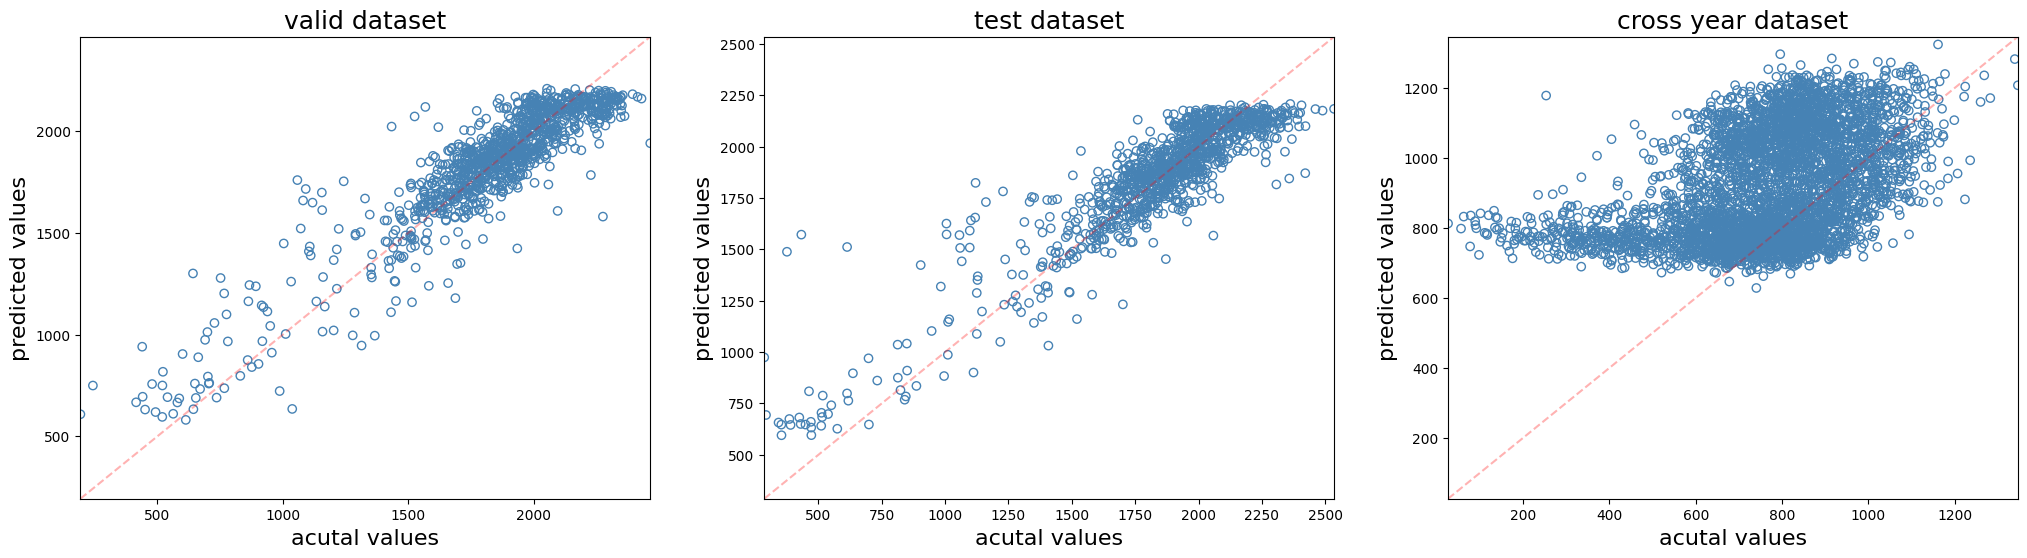

In [23]:
fig, axes = plt.subplots(ncols=3, figsize=(25, 6))

valid_min = np.min([y_valid.min(), valid_rbf_preds.min()])
valid_max = np.max([y_valid.max(), valid_rbf_preds.max()])
axes[0].scatter(y_valid, valid_rbf_preds, facecolors="none", edgecolors="steelblue");
axes[0].set_xlim([valid_min, valid_max])
axes[0].set_ylim([valid_min, valid_max])
axes[0].set_title("valid dataset", fontsize=18);
axes[0].set_xlabel("acutal values", fontsize=16);
axes[0].set_ylabel("predicted values", fontsize=16);
axes[0].plot([valid_min, valid_max], [valid_min, valid_max], linestyle="--", color="red", alpha=0.3);

test_min = np.min([y_test.min(), test_rbf_preds.min()])
test_max = np.max([y_test.max(), test_rbf_preds.max()])
axes[1].scatter(y_test, test_rbf_preds, facecolors="none", edgecolors="steelblue");
axes[1].set_xlim([test_min, test_max])
axes[1].set_ylim([test_min, test_max])
axes[1].set_title("test dataset", fontsize=18);
axes[1].set_xlabel("acutal values", fontsize=16);
axes[1].set_ylabel("predicted values", fontsize=16);
axes[1].plot([test_min, test_max], [test_min, test_max], linestyle="--", color="red", alpha=0.3);

cross_year_min = np.min([y_testset.min(), cross_year_rbf_preds.min()])
cross_year_max = np.max([y_testset.max(), cross_year_rbf_preds.max()])
axes[2].scatter(y_testset, cross_year_rbf_preds, facecolors="none", edgecolors="steelblue");
axes[2].set_xlim([cross_year_min, cross_year_max])
axes[2].set_ylim([cross_year_min, cross_year_max])
axes[2].set_title("cross year dataset", fontsize=18);
axes[2].set_xlabel("acutal values", fontsize=16);
axes[2].set_ylabel("predicted values", fontsize=16);
axes[2].plot([cross_year_min, cross_year_max], [cross_year_min, cross_year_max], linestyle="--", color="red", alpha=0.3);

##### linear

In [24]:
linear_svr.fit(x_train_cxhv, np.squeeze(y_train, -1))

valid_linear_preds = linear_svr.predict(x_valid_cxhv)
test_linear_preds = linear_svr.predict(x_test_cxhv)
cross_year_linear_preds = linear_svr.predict(x_testset_cxhv)

In [25]:
print(f"valid rmse:       {np.sqrt(mean_squared_error(y_valid, valid_linear_preds)):.3f}")
print(f"test rmse:       {np.sqrt(mean_squared_error(y_test, test_linear_preds)):.3f}")
print(f"cross year rmse:  {np.sqrt(mean_squared_error(y_testset, cross_year_linear_preds)):.3f}")

valid rmse:       168.812
test rmse:       173.776
cross year rmse:  398.544


In [26]:
print(f"valid pearsonr:       {pearsonr(np.squeeze(y_valid,-1), valid_linear_preds)[0]:.3f}")
print(f"test pearsonr:        {pearsonr(np.squeeze(y_test,-1), test_linear_preds)[0]:.3f}")
print(f"cross year pearsonr:  {pearsonr(np.squeeze(y_testset,-1), cross_year_linear_preds)[0]:.3f}")

valid pearsonr:       0.878
test pearsonr:        0.874
cross year pearsonr:  0.123


In [27]:
valid_rmse_p = np.sqrt(mean_squared_error(y_valid, valid_linear_preds)) / np.mean(y_valid)
print(f"valid rmse%: {valid_rmse_p * 100:.2f}%")
test_rmse_p = np.sqrt(mean_squared_error(y_test, test_linear_preds)) / np.mean(y_test)
print(f"test rmse%: {test_rmse_p * 100:.2f}%")
cross_year_rmse_p = np.sqrt(mean_squared_error(y_testset, cross_year_linear_preds)) / np.mean(y_testset)
print(f"cross year rmse%: {cross_year_rmse_p * 100:.2f}%")

valid rmse%: 9.23%
test rmse%: 9.41%
cross year rmse%: 51.72%


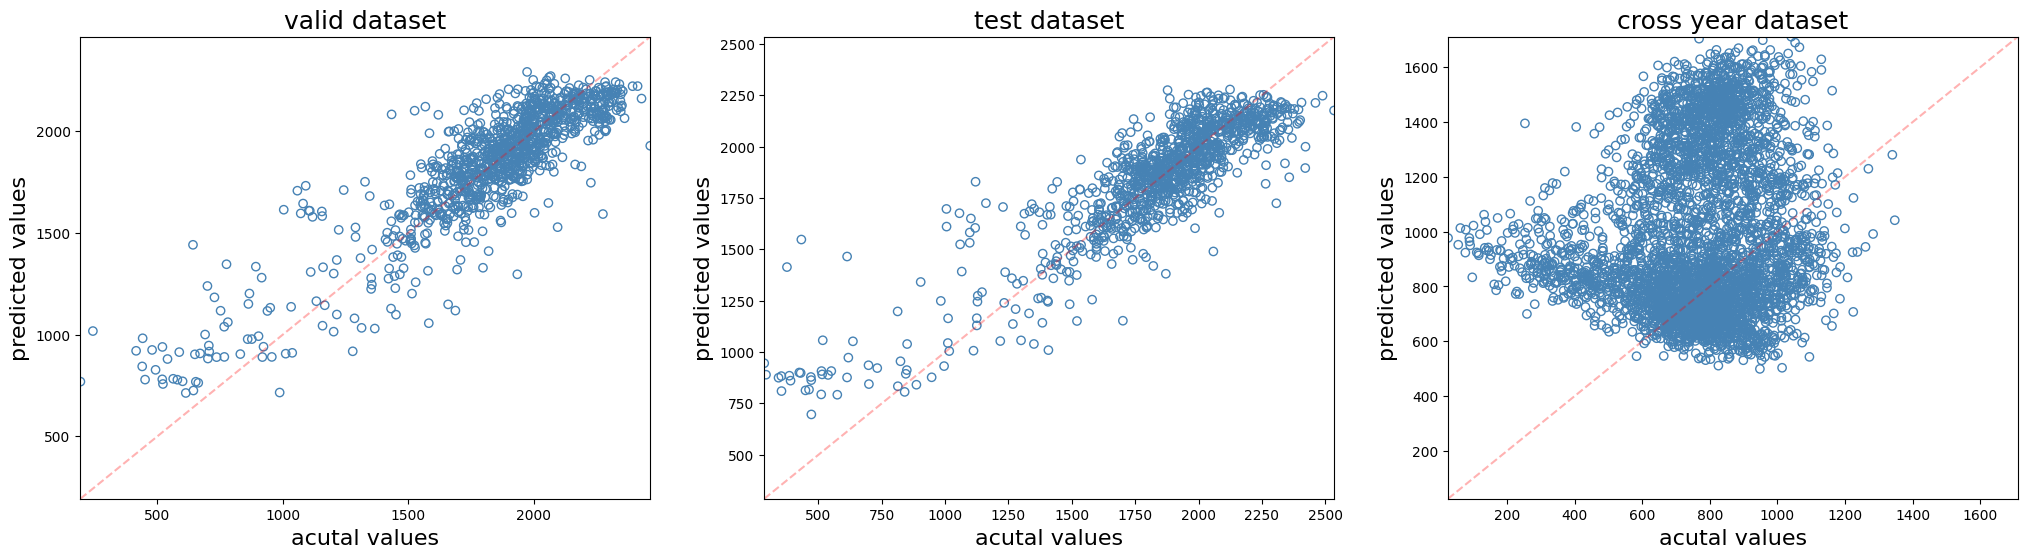

In [28]:
fig, axes = plt.subplots(ncols=3, figsize=(25, 6))

valid_min = np.min([y_valid.min(), valid_linear_preds.min()])
valid_max = np.max([y_valid.max(), valid_linear_preds.max()])
axes[0].scatter(y_valid, valid_linear_preds, facecolors="none", edgecolors="steelblue");
axes[0].set_xlim([valid_min, valid_max])
axes[0].set_ylim([valid_min, valid_max])
axes[0].set_title("valid dataset", fontsize=18);
axes[0].set_xlabel("acutal values", fontsize=16);
axes[0].set_ylabel("predicted values", fontsize=16);
axes[0].plot([valid_min, valid_max], [valid_min, valid_max], linestyle="--", color="red", alpha=0.3);

test_min = np.min([y_test.min(), test_linear_preds.min()])
test_max = np.max([y_test.max(), test_linear_preds.max()])
axes[1].scatter(y_test, test_linear_preds, facecolors="none", edgecolors="steelblue");
axes[1].set_xlim([test_min, test_max])
axes[1].set_ylim([test_min, test_max])
axes[1].set_title("test dataset", fontsize=18);
axes[1].set_xlabel("acutal values", fontsize=16);
axes[1].set_ylabel("predicted values", fontsize=16);
axes[1].plot([test_min, test_max], [test_min, test_max], linestyle="--", color="red", alpha=0.3);

cross_year_min = np.min([y_testset.min(), cross_year_linear_preds.min()])
cross_year_max = np.max([y_testset.max(), cross_year_linear_preds.max()])
axes[2].scatter(y_testset, cross_year_linear_preds, facecolors="none", edgecolors="steelblue");
axes[2].set_xlim([cross_year_min, cross_year_max])
axes[2].set_ylim([cross_year_min, cross_year_max])
axes[2].set_title("cross year dataset", fontsize=18);
axes[2].set_xlabel("acutal values", fontsize=16);
axes[2].set_ylabel("predicted values", fontsize=16);
axes[2].plot([cross_year_min, cross_year_max], [cross_year_min, cross_year_max], linestyle="--", color="red", alpha=0.3);

##### polynomial

In [29]:
polynomial_svr.fit(x_train_cxhv, np.squeeze(y_train, -1))

valid_polynomial_preds = polynomial_svr.predict(x_valid_cxhv)
test_polynomial_preds = polynomial_svr.predict(x_test_cxhv)
cross_year_polynomial_preds = polynomial_svr.predict(x_testset_cxhv)

In [30]:
print(f"valid rmse:       {np.sqrt(mean_squared_error(y_valid, valid_polynomial_preds)):.3f}")
print(f"test rmse:       {np.sqrt(mean_squared_error(y_test, test_polynomial_preds)):.3f}")
print(f"cross year rmse:  {np.sqrt(mean_squared_error(y_testset, cross_year_polynomial_preds)):.3f}")

valid rmse:       228.536
test rmse:       235.397
cross year rmse:  719.655


In [31]:
print(f"valid pearsonr:       {pearsonr(np.squeeze(y_valid,-1), valid_polynomial_preds)[0]:.3f}")
print(f"test pearsonr:        {pearsonr(np.squeeze(y_test,-1), test_polynomial_preds)[0]:.3f}")
print(f"cross year pearsonr:  {pearsonr(np.squeeze(y_testset,-1), cross_year_polynomial_preds)[0]:.3f}")

valid pearsonr:       0.809
test pearsonr:        0.800
cross year pearsonr:  0.288


In [32]:
valid_rmse_p = np.sqrt(mean_squared_error(y_valid, valid_polynomial_preds)) / np.mean(y_valid)
print(f"valid rmse%: {valid_rmse_p * 100:.2f}%")
test_rmse_p = np.sqrt(mean_squared_error(y_test, test_polynomial_preds)) / np.mean(y_test)
print(f"test rmse%: {test_rmse_p * 100:.2f}%")
cross_year_rmse_p = np.sqrt(mean_squared_error(y_testset, cross_year_polynomial_preds)) / np.mean(y_testset)
print(f"cross year rmse%: {cross_year_rmse_p * 100:.2f}%")

valid rmse%: 12.49%
test rmse%: 12.75%
cross year rmse%: 93.39%


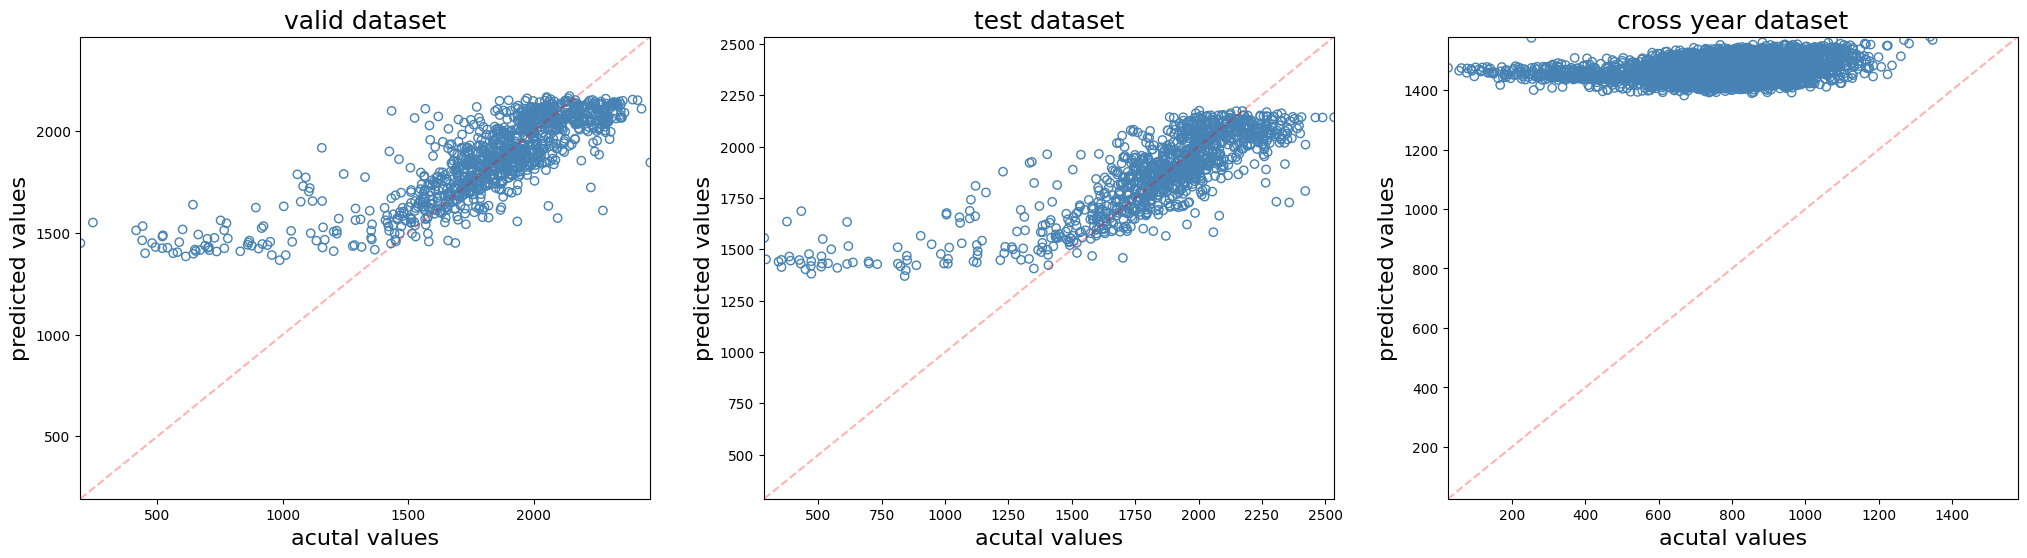

In [33]:
fig, axes = plt.subplots(ncols=3, figsize=(25, 6))

valid_min = np.min([y_valid.min(), valid_polynomial_preds.min()])
valid_max = np.max([y_valid.max(), valid_polynomial_preds.max()])
axes[0].scatter(y_valid, valid_polynomial_preds, facecolors="none", edgecolors="steelblue");
axes[0].set_xlim([valid_min, valid_max])
axes[0].set_ylim([valid_min, valid_max])
axes[0].set_title("valid dataset", fontsize=18);
axes[0].set_xlabel("acutal values", fontsize=16);
axes[0].set_ylabel("predicted values", fontsize=16);
axes[0].plot([valid_min, valid_max], [valid_min, valid_max], linestyle="--", color="red", alpha=0.3);

test_min = np.min([y_test.min(), test_polynomial_preds.min()])
test_max = np.max([y_test.max(), test_polynomial_preds.max()])
axes[1].scatter(y_test, test_polynomial_preds, facecolors="none", edgecolors="steelblue");
axes[1].set_xlim([test_min, test_max])
axes[1].set_ylim([test_min, test_max])
axes[1].set_title("test dataset", fontsize=18);
axes[1].set_xlabel("acutal values", fontsize=16);
axes[1].set_ylabel("predicted values", fontsize=16);
axes[1].plot([test_min, test_max], [test_min, test_max], linestyle="--", color="red", alpha=0.3);

cross_year_min = np.min([y_testset.min(), cross_year_polynomial_preds.min()])
cross_year_max = np.max([y_testset.max(), cross_year_polynomial_preds.max()])
axes[2].scatter(y_testset, cross_year_polynomial_preds, facecolors="none", edgecolors="steelblue");
axes[2].set_xlim([cross_year_min, cross_year_max])
axes[2].set_ylim([cross_year_min, cross_year_max])
axes[2].set_title("cross year dataset", fontsize=18);
axes[2].set_xlabel("acutal values", fontsize=16);
axes[2].set_ylabel("predicted values", fontsize=16);
axes[2].plot([cross_year_min, cross_year_max], [cross_year_min, cross_year_max], linestyle="--", color="red", alpha=0.3);

##### sigmoid

In [34]:
sigmoid_svr.fit(x_train_cxhv, np.squeeze(y_train, -1))

valid_sigmoid_preds = sigmoid_svr.predict(x_valid_cxhv)
test_sigmoid_preds = sigmoid_svr.predict(x_test_cxhv)
cross_year_sigmoid_preds = sigmoid_svr.predict(x_testset_cxhv)

In [35]:
print(f"valid rmse:       {np.sqrt(mean_squared_error(y_valid, valid_sigmoid_preds)):.3f}")
print(f"test rmse:       {np.sqrt(mean_squared_error(y_test, test_sigmoid_preds)):.3f}")
print(f"cross year rmse:  {np.sqrt(mean_squared_error(y_testset, cross_year_sigmoid_preds)):.3f}")

valid rmse:       264.692
test rmse:       269.871
cross year rmse:  896.736


In [36]:
print(f"valid pearsonr:       {pearsonr(np.squeeze(y_valid,-1), valid_sigmoid_preds)[0]:.3f}")
print(f"test pearsonr:        {pearsonr(np.squeeze(y_test,-1), test_sigmoid_preds)[0]:.3f}")
print(f"cross year pearsonr:  {pearsonr(np.squeeze(y_testset,-1), cross_year_sigmoid_preds)[0]:.3f}")

valid pearsonr:       0.744
test pearsonr:        0.733
cross year pearsonr:  0.334


In [37]:
valid_rmse_p = np.sqrt(mean_squared_error(y_valid, valid_sigmoid_preds)) / np.mean(y_valid)
print(f"valid rmse%: {valid_rmse_p * 100:.2f}%")
test_rmse_p = np.sqrt(mean_squared_error(y_test, test_sigmoid_preds)) / np.mean(y_test)
print(f"test rmse%: {test_rmse_p * 100:.2f}%")
cross_year_rmse_p = np.sqrt(mean_squared_error(y_testset, cross_year_sigmoid_preds)) / np.mean(y_testset)
print(f"cross year rmse%: {cross_year_rmse_p * 100:.2f}%")

valid rmse%: 14.47%
test rmse%: 14.61%
cross year rmse%: 116.37%


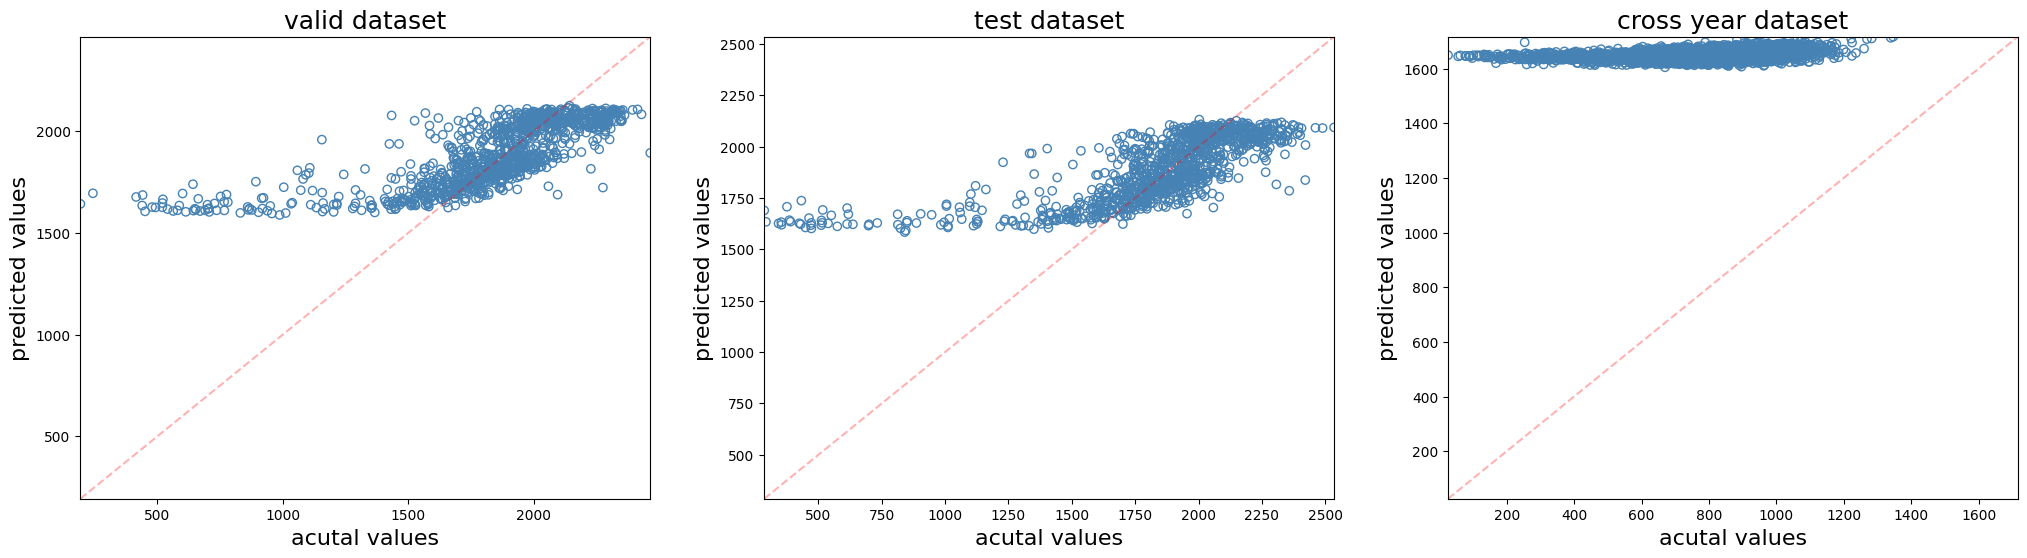

In [38]:
fig, axes = plt.subplots(ncols=3, figsize=(25, 6))

valid_min = np.min([y_valid.min(), valid_sigmoid_preds.min()])
valid_max = np.max([y_valid.max(), valid_sigmoid_preds.max()])
axes[0].scatter(y_valid, valid_sigmoid_preds, facecolors="none", edgecolors="steelblue");
axes[0].set_xlim([valid_min, valid_max])
axes[0].set_ylim([valid_min, valid_max])
axes[0].set_title("valid dataset", fontsize=18);
axes[0].set_xlabel("acutal values", fontsize=16);
axes[0].set_ylabel("predicted values", fontsize=16);
axes[0].plot([valid_min, valid_max], [valid_min, valid_max], linestyle="--", color="red", alpha=0.3);

test_min = np.min([y_test.min(), test_sigmoid_preds.min()])
test_max = np.max([y_test.max(), test_sigmoid_preds.max()])
axes[1].scatter(y_test, test_sigmoid_preds, facecolors="none", edgecolors="steelblue");
axes[1].set_xlim([test_min, test_max])
axes[1].set_ylim([test_min, test_max])
axes[1].set_title("test dataset", fontsize=18);
axes[1].set_xlabel("acutal values", fontsize=16);
axes[1].set_ylabel("predicted values", fontsize=16);
axes[1].plot([test_min, test_max], [test_min, test_max], linestyle="--", color="red", alpha=0.3);

cross_year_min = np.min([y_testset.min(), cross_year_sigmoid_preds.min()])
cross_year_max = np.max([y_testset.max(), cross_year_sigmoid_preds.max()])
axes[2].scatter(y_testset, cross_year_sigmoid_preds, facecolors="none", edgecolors="steelblue");
axes[2].set_xlim([cross_year_min, cross_year_max])
axes[2].set_ylim([cross_year_min, cross_year_max])
axes[2].set_title("cross year dataset", fontsize=18);
axes[2].set_xlabel("acutal values", fontsize=16);
axes[2].set_ylabel("predicted values", fontsize=16);
axes[2].plot([cross_year_min, cross_year_max], [cross_year_min, cross_year_max], linestyle="--", color="red", alpha=0.3);